# KAGGLE-LIKE CHALLENGE
On vous propose ici de tester tout ce que vous avez appris sur le machine learning supervisé, dans le but de faire un modèle de prédiction sur des données fournies, à la manière des compétitions Kaggle.

**Déroulement d'un challenge Kaggle**
- Kaggle vous envoie toujours deux datasets :
  - un fichier data_train.csv qui contient des données correspondant aux variables X, et au label Y à prédire. Utilisez ce fichier pour entraîner vos modèles comme d'habitude.
  - un fichier data_test.csv, qui contient les données X au même format que dans data_train.csv, mais cette fois les labels sont cachés. Votre but est de faire des prédictions sur ces données et de renvoyer ces prédictions à Kaggle, pour qu'ils évaluent votre modèle de manière indépendante
- Kaggle compare vos prédictions aux vrais labels et propose un leaderboard (équipes classées en fonction de leur score)
- Kaggle vous annonce à l'avance quelle métrique va être utilisée pour évaluer les modèles : veillez à utiliser la même métrique pour évaluer les performances de vos modèles

**Prédiction de conversion**

Ici, on vous propose d'essayer de créer le meilleur modèle pour prédire des conversions en fonction de différentes variables explicatives. Vos modèles seront évalués à l'aide du f1-score.

*Inspirez-vous du template ci-dessous pour la lecture des fichiers, la structure à suivre, et l'écriture des prédictions finales.*

In [91]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# feature number of page visited
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

#tous les features numeriques et alphanumeriques

# Read file with labels

In [92]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [93]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [94]:



data.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000








# Explore dataset

In [95]:
data.corr()
#target =converted
#principale correlation entre features numeriques et target :'total_pages_visited'

,age,new_user,total_pages_visited,converted
age,1.000000,0.011676,-0.045365,-0.088265
new_user,0.011676,1.000000,-0.082986,-0.152115
total_pages_visited,-0.045365,-0.082986,1.000000,0.529192
converted,-0.088265,-0.152115,0.529192,1.000000


In [96]:
data.shape

(284580, 6)

In [97]:

data

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [98]:



data.info()
# features numeriques age,new user,total pages visited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


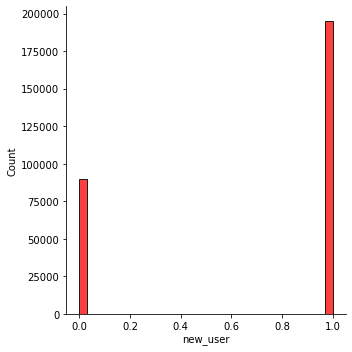

In [99]:
plot=sns.displot(data.new_user,kde=False,color="r")

In [100]:





# Don't forget to compute statistics and visualize your data
#sns.lmplot(x="total_pages_visited",y="converted",data=data,logistic=True)

In [101]:
# les conversions 
print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

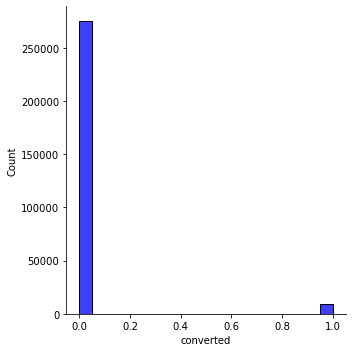

In [102]:
sns.displot(data['converted'],color="b")
#la classe 0 (non converti) est surreprésentee 97%

# Make your model (as always)

## Choose variables to use in the model, and create train and test sets

In [103]:
#features_list =
feature_list_1=['country','age','new_user','source','total_pages_visited']

target_variable = 'converted'

In [104]:
sumconv=data['converted'].sum()
sumconv
#total des conversions

9180

In [105]:
#pourcentage de converted dans le dataset "train+test"
tauxconvert=sumconv/data.shape[0]
tauxconvert
print ("taux de convertis:" "{:0.00%}".format(tauxconvert))

taux de convertis:3%


In [106]:

X= data.loc[:,feature_list_1]
Y = data.loc[:, target_variable]


print('Variables explicatives : ', X.columns)
print(Y)
print()
print(X)

Variables explicatives :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')
0         0
1         0
2         1
3         0
4         0
         ..
284575    0
284576    0
284577    0
284578    0
284579    0
Name: converted, Length: 284580, dtype: int64

        country  age  new_user  source  total_pages_visited
0         China   22         1  Direct                    2
1            UK   21         1     Ads                    3
2       Germany   20         0     Seo                   14
3            US   23         1     Seo                    3
4            US   28         1  Direct                    3
...         ...  ...       ...     ...                  ...
284575       US   36         1     Ads                    1
284576       US   31         1     Seo                    2
284577       US   41         1     Seo                    5
284578       US   31         1  Direct                    4
284579       US   26         0     Ads          

In [107]:
# Divide dataset Train set & Test set 
#equilibrage des classes sur les echantillons cibles 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)

print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [108]:
#positions des colonnes numeriques dans TRainprint(X_train[0:5,:]) # see where the numeric columns are in X_train

In [109]:
 # Positions of numeric columns in X_train/X_test
# Create pipeline for numeric features
numeric_features = [1,2,4]    
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [110]:
#creation des pipelines de transformations
# Create pipeline for categorical features
categorical_features = [0,3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [111]:
from sklearn.compose import ColumnTransformer

In [112]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")


X_train = preprocessor.fit_transform(X_train)

print('x_train',X_train[0:5,:])
print('done2')

# Preprocessings on test set
print("Performing preprocessings on test set...")

X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print('X_test post transform',X_test[0:5,:])
print()

Performing preprocessings on train set...
x_train [[-0.91458053 -1.4767432  -0.85939501  0.          0.          0.
   1.          0.        ]
 [-0.30994956 -1.4767432  -0.85939501  0.          0.          0.
   0.          0.        ]
 [-0.06809718  0.67716581  0.63639894  0.          0.          0.
   0.          1.        ]
 [ 0.77838618  0.67716581 -0.56023622  0.          1.          0.
   0.          1.        ]
 [ 0.05282902  0.67716581  0.93555773  0.          0.          1.
   0.          0.        ]]
done2
Performing preprocessings on test set...
...Done.
X_test post transform [[-0.79365434  0.67716581  2.73051047  0.          0.          0.
   0.          0.        ]
 [ 0.53653379 -1.4767432   0.03808136  0.          0.          1.
   1.          0.        ]
 [-0.18902337 -1.4767432  -0.26107743  0.          0.          1.
   1.          0.        ]
 [ 0.05282902  0.67716581  0.93555773  0.          0.          0.
   0.          1.        ]
 [-0.30994956  0.67716581 -0.85939

In [113]:


print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

[[-0.79365434  0.67716581  2.73051047  0.          0.          0.
   0.          0.        ]
 [ 0.53653379 -1.4767432   0.03808136  0.          0.          1.
   1.          0.        ]]

178877    0
215523    0
73318     0
58164     0
234640    0
Name: converted, dtype: int64
269237    0
23327     0
Name: converted, dtype: int64


## Training pipeline

In [114]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.91458053 -1.4767432  -0.85939501 -0.20694211 -0.42557377 -1.1340857
   1.83411565 -0.98047344]
 [-0.30994956 -1.4767432  -0.85939501 -0.20694211 -0.42557377 -1.1340857
  -0.54522189 -0.98047344]
 [-0.06809718  0.67716581  0.63639894 -0.20694211 -0.42557377 -1.1340857
  -0.54522189  1.01991544]
 [ 0.77838618  0.67716581 -0.56023622 -0.20694211  2.34976885 -1.1340857
  -0.54522189  1.01991544]
 [ 0.05282902  0.67716581  0.93555773 -0.20694211 -0.42557377  0.88176757
  -0.54522189 -0.98047344]]


In [115]:
type(X_train)

numpy.ndarray

In [116]:
# Train model
print("Train model...")

classifier = LogisticRegressionCV() # regression logistique

classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [117]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]




## Test pipeline

In [118]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding standardizing numerical features...
...Done
[[-0.79365434  0.67716581  2.73051047 -0.20694211 -0.42557377 -1.1340857
  -0.54522189 -0.98047344]
 [ 0.53653379 -1.4767432   0.03808136 -0.20694211 -0.42557377  0.88176757
   1.83411565 -0.98047344]
 [-0.18902337 -1.4767432  -0.26107743 -0.20694211 -0.42557377  0.88176757
   1.83411565 -0.98047344]
 [ 0.05282902  0.67716581  0.93555773 -0.20694211 -0.42557377 -1.1340857
  -0.54522189  1.01991544]
 [-0.30994956  0.67716581 -0.85939501 -0.20694211 -0.42557377  0.88176757
  -0.54522189  1.01991544]]


In [119]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [120]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7642178509300147
f1-score on test set :  0.7598306110102844


Confusion matrix on train set : 


<AxesSubplot:>

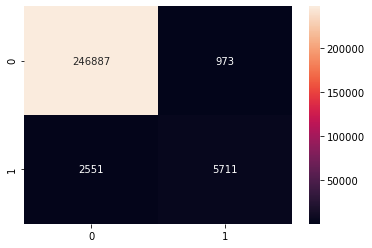

In [121]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
cm = confusion_matrix(Y_train, Y_train_pred)


sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

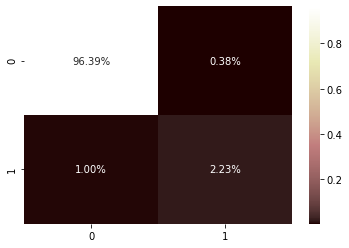

In [122]:
# graphique cm de Train en %
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='pink')

Confusion matrix on test set : 


<AxesSubplot:>

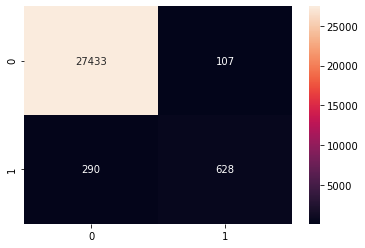

In [123]:
# graphique CM de test
print("Confusion matrix on test set : ")
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

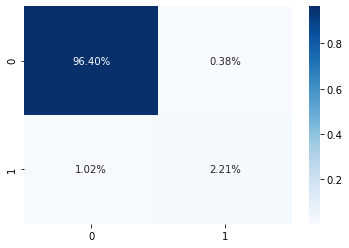

In [124]:
# graphique cm de test en %
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [125]:

X_train

array([[-0.91458053, -1.4767432 , -0.85939501, ..., -1.1340857 ,
         1.83411565, -0.98047344],
       [-0.30994956, -1.4767432 , -0.85939501, ..., -1.1340857 ,
        -0.54522189, -0.98047344],
       [-0.06809718,  0.67716581,  0.63639894, ..., -1.1340857 ,
        -0.54522189,  1.01991544],
       ...,
       [ 0.05282902, -1.4767432 , -1.1585538 , ...,  0.88176757,
        -0.54522189, -0.98047344],
       [-0.43087576, -1.4767432 ,  1.23471652, ..., -1.1340857 ,
        -0.54522189, -0.98047344],
       [ 0.65745999,  0.67716581,  0.93555773, ...,  0.88176757,
        -0.54522189,  1.01991544]])

In [126]:
len(X_train)

256122

In [127]:
Y_train

178877    0
215523    0
73318     0
58164     0
234640    0
         ..
54354     0
243326    0
136997    0
70286     0
239123    0
Name: converted, Length: 256122, dtype: int64

In [128]:
len(Y_train)

256122

In [129]:
classifier.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [130]:
X

,country,age,new_user,source,total_pages_visited
0,China,22,1,Direct,2
1,UK,21,1,Ads,3
2,Germany,20,0,Seo,14
3,US,23,1,Seo,3
4,US,28,1,Direct,3
...,...,...,...,...,...
284575,US,36,1,Ads,1
284576,US,31,1,Seo,2
284577,US,41,1,Seo,5
284578,US,31,1,Direct,4


In [131]:
type(X)

pandas.core.frame.DataFrame

In [132]:
Y

0         0
1         0
2         1
3         0
4         0
         ..
284575    0
284576    0
284577    0
284578    0
284579    0
Name: converted, Length: 284580, dtype: int64

In [133]:
type(Y)

pandas.core.series.Series


# Train best classifier on all data and use it to make predictions on X_without_labels

In [134]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)
type(X)
type(Y)
classifier.fit(X,Y)



LogisticRegressionCV()

In [135]:
data_without_labels = pd.read_csv('conversion_data_test.csv')
data_without_labels1=data_without_labels
data_without_labels1

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3
...,...,...,...,...,...
31615,Germany,25,1,Seo,3
31616,US,36,1,Ads,7
31617,UK,33,1,Seo,5
31618,UK,25,1,Seo,14


In [136]:
# Read data without labels
#data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels1.shape)


Prediction set (without labels) : (31620, 5)


In [137]:
 # Positions of numeric columns in X_train/X_test
# Create pipeline for numeric features
numeric_features = [1,2,4]    
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [138]:
# Create pipeline for categorical features
categorical_features = [0, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    #       ('encoder', OneHotEncoder()) 
    ])

In [139]:


# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)



feature_list=['country','age','new_user','source','total_pages_visited']


X_without_labels = data_without_labels1[feature_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done",X_without_labels)

print(X_without_labels[0:5,:])# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on X set...")


X_without_labels= preprocessor.fit_transform(X_without_labels)

print('done2',X_without_labels)



Convert pandas DataFrames to numpy arrays...
...Done [['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ...
 ['UK' 33 1 'Seo' 5]
 ['UK' 25 1 'Seo' 14]
 ['US' 22 1 'Seo' 2]]
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]
Performing preprocessings on X set...
done2 [[-0.31512217 -1.47663353  3.33913917 ...  0.          0.
   1.        ]
 [-1.03657046  0.6772161   0.03888347 ...  0.          1.
   0.        ]
 [ 0.16584336  0.6772161  -1.16120951 ...  0.          0.
   1.        ]
 ...
 [ 0.28608475  0.6772161   0.03888347 ...  0.          0.
   1.        ]
 [-0.67584631  0.6772161   2.73909268 ...  0.          0.
   1.        ]
 [-1.03657046  0.6772161  -0.86118627 ...  1.          0.
   1.        ]]


In [140]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_[AlainS-model5].csv', index=False)


In [141]:
y=classifier.predict(X_without_labels)


In [142]:
sum(y)

1001

In [143]:
len(y)

31620

In [144]:
print(Y_predictions)

       converted
0              1
1              0
2              0
3              0
4              0
...          ...
31615          0
31616          0
31617          0
31618          1
31619          0

[31620 rows x 1 columns]


In [145]:
print(data)

{'converted': array([1, 0, 0, ..., 0, 1, 0])}


In [146]:
sum(data['converted'])

1001